<h1>AI Face Mask Detector.</h1>
<ul>
<li>Shubhang Khattar</li>
</ul>

<hr>
<p>Goal for this phase of the project is to update the previously developed a Deep Learning Convolutional Neural Network (CNN) model, implement K-Fold cross validation and segregate our data based on the BIAS factors listed below:</p>
<ol>
<li>Age: Old</li>
<li>Age: Adult</li>
<li>Age: Children</li>
<li>Gender: Male</li>
<li>Gender: Female</li>
</ol>


<h5> Importing packages </h5>
<p> All packages to be imported will be declared all together to keep code clean </p>

In [1]:
import os
from torch.nn import functional
import torch
from torchvision.transforms import Compose,Resize,Normalize,ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import KFold
import warnings
from tqdm.notebook import tqdm_notebook
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

<h5> Declarion & Initialization of major variables </h5>
<p> All variables that are used repeatedly over this notebook are declared here </p>

In [2]:
classes = {0:'Cloth_Mask', 1:'N-95', 2:'N-95 with valve', 3:'No_Mask',4:'Surgical_Mask'}
target_names = ['Cloth_Mask', 'N95', 'N95_With_Valve', 'No_Mask', 'Surgical']
labels_names = [0,1,2,3,4]
mean=[0.485, 0.456, 0.406]
std=[0.225, 0.225, 0.225]
transformer = Compose([Resize((128,128)), ToTensor(), Normalize(mean=mean,std=std)])

<h5> Evaluate Bias method </h5>
<p> This method takes picture path, category and model as paramters and runs this model on every picture present in this category. </p>

In [3]:
def evaluate_bias(path,category,model):
    for sub_category in os.listdir(path):
        print(f'Evaluating Bias on {category} Category: {sub_category}')
        dataset = ImageFolder(root=os.path.join(path,sub_category),transform=transformer)
        data_test_loader = DataLoader(dataset,batch_size=1)

        correct_labels = []
        predicted_labels = []

        model.eval()
        with torch.no_grad():
            for  i,(images,labels) in enumerate(data_test_loader):
                outputs = model(images.to(device))
                outputs = torch.argmax(functional.softmax(outputs),dim=1)
                if predicted_labels==[]:
                    correct_labels=labels[:];
                    predicted_labels = outputs[:]

                else:

                    correct_labels = torch.hstack([correct_labels,labels])
                    predicted_labels = torch.hstack([predicted_labels,outputs])

            cm = confusion_matrix(correct_labels, predicted_labels,labels=labels_names)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
            disp = disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
            plt.show()
            print(classification_report(correct_labels, predicted_labels,labels=labels_names,target_names=target_names))


<h1>Loading old Model for Bias Testing</h1>
<p>
The evaluation metrics used here are similar to the ones that were used in the Phase 1 part of the project, accuracy, precision, recall
and F1-score. The function “evaluate_bias” is called for every bias category by passing the directory
path/folder of the biased images, the trained and saved model and the category definition as
parameters. This function runs the testing on all individual data present inside these folders based
on the trained model that has been saved previously.
</p>

In [4]:
from cnn_old import CNN_Old
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_old = CNN_Old().to(device)
print(model_old)
model_old.load_state_dict(torch.load("CNN_old.data"), strict=False)

CNN_Old(
  (convolution_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, aff

<All keys matched successfully>

<h2>Bias Testing for Age</h2>
<p> evaluate_bias method is called for category = age and img_path = Bias/Age and a convolution matrix is displayed for the same</p>

Evaluating Bias on Age Category: Old


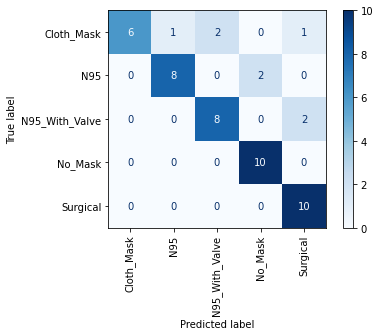

                precision    recall  f1-score   support

    Cloth_Mask       1.00      0.60      0.75        10
           N95       0.89      0.80      0.84        10
N95_With_Valve       0.80      0.80      0.80        10
       No_Mask       0.83      1.00      0.91        10
      Surgical       0.77      1.00      0.87        10

      accuracy                           0.84        50
     macro avg       0.86      0.84      0.83        50
  weighted avg       0.86      0.84      0.83        50

Evaluating Bias on Age Category: Adult


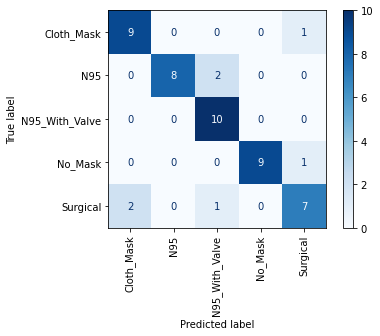

                precision    recall  f1-score   support

    Cloth_Mask       0.82      0.90      0.86        10
           N95       1.00      0.80      0.89        10
N95_With_Valve       0.77      1.00      0.87        10
       No_Mask       1.00      0.90      0.95        10
      Surgical       0.78      0.70      0.74        10

      accuracy                           0.86        50
     macro avg       0.87      0.86      0.86        50
  weighted avg       0.87      0.86      0.86        50

Evaluating Bias on Age Category: Children


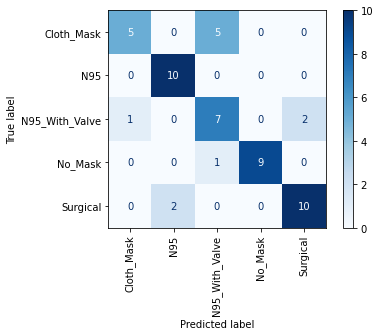

                precision    recall  f1-score   support

    Cloth_Mask       0.83      0.50      0.62        10
           N95       0.83      1.00      0.91        10
N95_With_Valve       0.54      0.70      0.61        10
       No_Mask       1.00      0.90      0.95        10
      Surgical       0.83      0.83      0.83        12

      accuracy                           0.79        52
     macro avg       0.81      0.79      0.78        52
  weighted avg       0.81      0.79      0.79        52



In [5]:
img_path = 'Bias/Age'
category = 'Age'
evaluate_bias(img_path,category,model_old)

<h2>Bias Testing for Gender</h2>
<p> evaluate_bias method is called for category = Gender and img_path = Bias/Gender and a convolution matrix is displayed for the same</p>

Evaluating Bias on Gender Category: Male


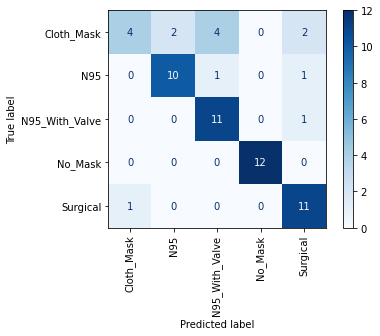

                precision    recall  f1-score   support

    Cloth_Mask       0.80      0.33      0.47        12
           N95       0.83      0.83      0.83        12
N95_With_Valve       0.69      0.92      0.79        12
       No_Mask       1.00      1.00      1.00        12
      Surgical       0.73      0.92      0.81        12

      accuracy                           0.80        60
     macro avg       0.81      0.80      0.78        60
  weighted avg       0.81      0.80      0.78        60

Evaluating Bias on Gender Category: Female


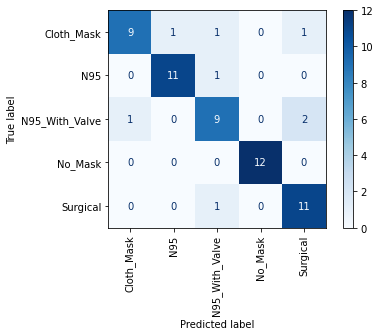

                precision    recall  f1-score   support

    Cloth_Mask       0.90      0.75      0.82        12
           N95       0.92      0.92      0.92        12
N95_With_Valve       0.75      0.75      0.75        12
       No_Mask       1.00      1.00      1.00        12
      Surgical       0.79      0.92      0.85        12

      accuracy                           0.87        60
     macro avg       0.87      0.87      0.87        60
  weighted avg       0.87      0.87      0.87        60



In [6]:
img_path = 'Bias/Gender'
category = 'Gender'
evaluate_bias(img_path,category,model_old)

<h1>Loading New Model </h1>

In [7]:
from cnn_new import CNN_New
model_new = CNN_New().to(device)
print(model_new)
model_new.load_state_dict(torch.load("CNN_new.data"), strict=False)

CNN_New(
  (convolution_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected_layers): Sequential(
    (0): Linea

<All keys matched successfully>

<h1>Bias Testing for Age (New Model)</h2>
<p> evaluate_bias method is called for category = age and img_path = Bias/Age and a convolution matrix is displayed for the same</p>

Evaluating Bias on Age Category: Old


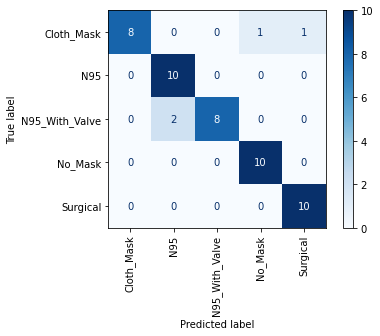

                precision    recall  f1-score   support

    Cloth_Mask       1.00      0.80      0.89        10
           N95       0.83      1.00      0.91        10
N95_With_Valve       1.00      0.80      0.89        10
       No_Mask       0.91      1.00      0.95        10
      Surgical       0.91      1.00      0.95        10

      accuracy                           0.92        50
     macro avg       0.93      0.92      0.92        50
  weighted avg       0.93      0.92      0.92        50

Evaluating Bias on Age Category: Adult


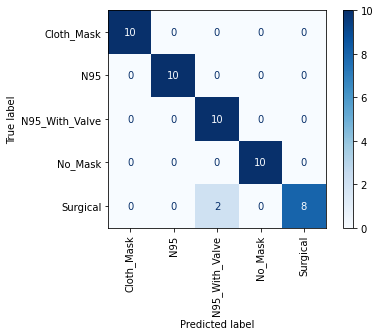

                precision    recall  f1-score   support

    Cloth_Mask       1.00      1.00      1.00        10
           N95       1.00      1.00      1.00        10
N95_With_Valve       0.83      1.00      0.91        10
       No_Mask       1.00      1.00      1.00        10
      Surgical       1.00      0.80      0.89        10

      accuracy                           0.96        50
     macro avg       0.97      0.96      0.96        50
  weighted avg       0.97      0.96      0.96        50

Evaluating Bias on Age Category: Children


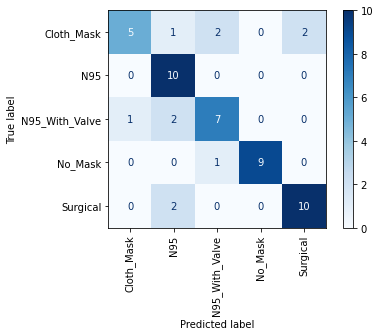

                precision    recall  f1-score   support

    Cloth_Mask       0.83      0.50      0.62        10
           N95       0.67      1.00      0.80        10
N95_With_Valve       0.70      0.70      0.70        10
       No_Mask       1.00      0.90      0.95        10
      Surgical       0.83      0.83      0.83        12

      accuracy                           0.79        52
     macro avg       0.81      0.79      0.78        52
  weighted avg       0.81      0.79      0.78        52



In [8]:
img_path = 'Bias/Age'
category = 'Age'
evaluate_bias(img_path,category,model_new)

<h2>Bias Testing for Gender (New Model)</h2>
<p> evaluate_bias method is called for category = Gender and img_path = Bias/Gender and a convolution matrix is displayed for the same</p>

Evaluating Bias on Gender Category: Male


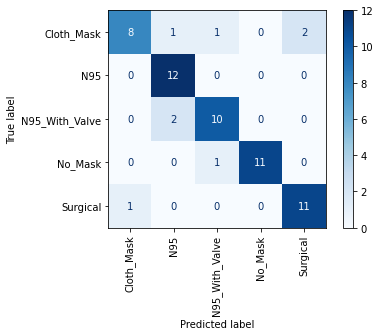

                precision    recall  f1-score   support

    Cloth_Mask       0.89      0.67      0.76        12
           N95       0.80      1.00      0.89        12
N95_With_Valve       0.83      0.83      0.83        12
       No_Mask       1.00      0.92      0.96        12
      Surgical       0.85      0.92      0.88        12

      accuracy                           0.87        60
     macro avg       0.87      0.87      0.86        60
  weighted avg       0.87      0.87      0.86        60

Evaluating Bias on Gender Category: Female


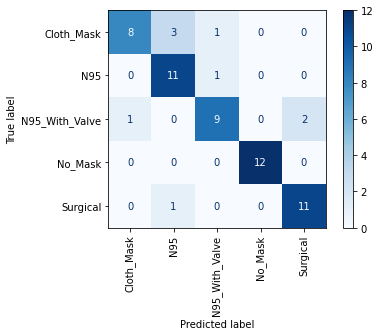

                precision    recall  f1-score   support

    Cloth_Mask       0.89      0.67      0.76        12
           N95       0.73      0.92      0.81        12
N95_With_Valve       0.82      0.75      0.78        12
       No_Mask       1.00      1.00      1.00        12
      Surgical       0.85      0.92      0.88        12

      accuracy                           0.85        60
     macro avg       0.86      0.85      0.85        60
  weighted avg       0.86      0.85      0.85        60



In [9]:
img_path = 'Bias/Gender'
category = 'Gender'
evaluate_bias(img_path,category,model_new)

<h1>K-Fold</h1>
<p>
K – Fold Cross Validation is utilized to overcome the false accuracy produced by the CNN model.
Usually the CNN model we split the data into training and testing data and then train the model
using the training data and further use it to test the testing data. However this methodology is not
highly accurate and reliable as the accuracy obtained for one test set can be very different from the
accuracy obtained by another test set. In a K-fold cross validation, the data is divided into several
folds and then ensuring that each fold is used as a testing set at some point of time. In our use case,
we split our data into 10 folds. In the first iteration, the first fold is used for testing and the remaining
is used for training. In the second iteration, the second fold is used for testing and the remaining is
used for training. This is continued till the 10th fold.
</p>

In [10]:
epochs = 20
folds = 10
batch_size = 32
learning_rate = 0.001
img_path = 'Project_Dataset_2'

In [11]:
def k_fold(data_path,model):
    complete_dataset = ImageFolder(root=data_path, transform=transformer)
    fold_metrics = []
    kf = KFold(n_splits=folds, shuffle=True)
    for fold, (train, valid) in enumerate(kf.split(complete_dataset)):
        print(f"Fold {fold + 1} training in progress...")
        train_loader = DataLoader(complete_dataset, batch_size=32, sampler=train)
        valid_loader = DataLoader(complete_dataset, batch_size=32, sampler=valid)

        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        loss_func = nn.CrossEntropyLoss()

        model.train()
        for epoch in tqdm_notebook(range(epochs) , desc = f"Fold {fold+1}, Epochs Completed : "):
            for i, (batch, labels) in enumerate(train_loader):
                outputs = model(batch.to(device))
                model.zero_grad()
                loss_training = loss_func(outputs, labels.to(device))
                loss_training.backward()
                optimizer.step()
            print(f"\tEpoch - {epoch + 1}, Training Loss : {loss_training} ")

        model.eval()
        correct_labels = []
        predicted_labels = []

        with torch.no_grad():
            for i, (images,labels) in enumerate(valid_loader):
                outputs = model(images.to(device))
                outputs = torch.argmax(functional.softmax(outputs), dim=1)
                if predicted_labels==[]:
                    correct_labels=labels[:];
                    predicted_labels = outputs[:]
                else:
                    correct_labels = torch.hstack([correct_labels,labels])
                    predicted_labels = torch.hstack([predicted_labels,outputs])
            accuracy = float((correct_labels == predicted_labels).sum() / len(correct_labels))
            precision = precision_score(correct_labels, predicted_labels, average='weighted')
            recall = recall_score(correct_labels, predicted_labels, average='weighted')
            f1 = f1_score(correct_labels, predicted_labels, average='weighted')
            fold_metrics.append((accuracy, precision, recall, f1))

            print(f"\nFold {fold+1} Classification Report : ")
            print(classification_report(correct_labels, predicted_labels,target_names = complete_dataset.classes))

    metrics = ['Accuracy','Precision','Recall','F1 Score']
    fold_metrics = torch.tensor(fold_metrics)
    plt.figure(figsize=(12,8))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.bar(range(1,folds+1),fold_metrics[:,i],color ='maroon')
        plt.xticks(range(folds))
        plt.ylabel(metrics[i])
        plt.xlabel('folds')

<h2>K-Fold old model</h2>
<p> K-Fold being used on the old model developed in phase 1 of this project. </p>

Fold 1 training in progress...


Fold 1, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 0.5603816509246826 
	Epoch - 3, Training Loss : 0.05598866939544678 
	Epoch - 4, Training Loss : 0.7799169421195984 
	Epoch - 5, Training Loss : 0.7251946926116943 
	Epoch - 6, Training Loss : 0.7513665556907654 
	Epoch - 7, Training Loss : 0.6279093027114868 
	Epoch - 8, Training Loss : 0.49505487084388733 
	Epoch - 9, Training Loss : 0.5373709797859192 
	Epoch - 10, Training Loss : 0.49228885769844055 
	Epoch - 11, Training Loss : 0.5357295274734497 
	Epoch - 12, Training Loss : 0.34195995330810547 
	Epoch - 13, Training Loss : 0.35834088921546936 
	Epoch - 14, Training Loss : 0.4799238443374634 
	Epoch - 15, Training Loss : 0.4575916826725006 
	Epoch - 16, Training Loss : 0.20850783586502075 
	Epoch - 17, Training Loss : 0.19972676038742065 
	Epoch - 18, Training Loss : 0.1739281564950943 
	Epoch - 19, Training Loss : 0.09461017698049545 
	Epoch - 20, Training Loss : 0.16413241624832153 

Fold 1 Classification Report : 
  

Fold 2, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.38566699624061584 
	Epoch - 2, Training Loss : 2.1210286617279053 
	Epoch - 3, Training Loss : 0.012452044524252415 
	Epoch - 4, Training Loss : 1.1844077110290527 
	Epoch - 5, Training Loss : 0.4956444799900055 
	Epoch - 6, Training Loss : 1.6734429597854614 
	Epoch - 7, Training Loss : 1.8634551763534546 
	Epoch - 8, Training Loss : 0.3266799747943878 
	Epoch - 9, Training Loss : 0.036572787910699844 
	Epoch - 10, Training Loss : 0.8995981812477112 
	Epoch - 11, Training Loss : 0.392538458108902 
	Epoch - 12, Training Loss : 0.6113470792770386 
	Epoch - 13, Training Loss : 0.07792980968952179 
	Epoch - 14, Training Loss : 0.6427873969078064 
	Epoch - 15, Training Loss : 0.8553032279014587 
	Epoch - 16, Training Loss : 0.18438833951950073 
	Epoch - 17, Training Loss : 0.1959141343832016 
	Epoch - 18, Training Loss : 1.641198754310608 
	Epoch - 19, Training Loss : 0.15968681871891022 
	Epoch - 20, Training Loss : 0.33410775661468506 

Fold 2 Classification

Fold 3, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.8921477198600769 
	Epoch - 2, Training Loss : 0.004536892753094435 
	Epoch - 3, Training Loss : 1.3769069910049438 
	Epoch - 4, Training Loss : 0.6605255007743835 
	Epoch - 5, Training Loss : 1.069909691810608 
	Epoch - 6, Training Loss : 1.2478771209716797 
	Epoch - 7, Training Loss : 0.6103681921958923 
	Epoch - 8, Training Loss : 0.23837196826934814 
	Epoch - 9, Training Loss : 0.5900461077690125 
	Epoch - 10, Training Loss : 0.018176501616835594 
	Epoch - 11, Training Loss : 1.2704308032989502 
	Epoch - 12, Training Loss : 0.07164213061332703 
	Epoch - 13, Training Loss : 0.22574026882648468 
	Epoch - 14, Training Loss : 0.5051019787788391 
	Epoch - 15, Training Loss : 0.6001256704330444 
	Epoch - 16, Training Loss : 0.6744609475135803 
	Epoch - 17, Training Loss : 1.1450293064117432 
	Epoch - 18, Training Loss : 0.018927784636616707 
	Epoch - 19, Training Loss : 0.005979353096336126 
	Epoch - 20, Training Loss : 0.6237298846244812 

Fold 3 Classificat

Fold 4, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.06758129596710205 
	Epoch - 2, Training Loss : 0.8566632866859436 
	Epoch - 3, Training Loss : 0.886336624622345 
	Epoch - 4, Training Loss : 0.017761433497071266 
	Epoch - 5, Training Loss : 0.9172773361206055 
	Epoch - 6, Training Loss : 0.7778691649436951 
	Epoch - 7, Training Loss : 0.4149494171142578 
	Epoch - 8, Training Loss : 0.3676797151565552 
	Epoch - 9, Training Loss : 0.247354194521904 
	Epoch - 10, Training Loss : 0.14641070365905762 
	Epoch - 11, Training Loss : 0.3714583218097687 
	Epoch - 12, Training Loss : 0.1266183704137802 
	Epoch - 13, Training Loss : 0.15168426930904388 
	Epoch - 14, Training Loss : 0.4590672254562378 
	Epoch - 15, Training Loss : 0.38802793622016907 
	Epoch - 16, Training Loss : 0.46978628635406494 
	Epoch - 17, Training Loss : 0.4401041567325592 
	Epoch - 18, Training Loss : 0.1571178436279297 
	Epoch - 19, Training Loss : 0.24257086217403412 
	Epoch - 20, Training Loss : 0.3462289273738861 

Fold 4 Classification 

Fold 5, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.5629094839096069 
	Epoch - 2, Training Loss : 0.03505965694785118 
	Epoch - 3, Training Loss : 0.3134784400463104 
	Epoch - 4, Training Loss : 0.10204720497131348 
	Epoch - 5, Training Loss : 0.03763935714960098 
	Epoch - 6, Training Loss : 0.08519270271062851 
	Epoch - 7, Training Loss : 0.08143540471792221 
	Epoch - 8, Training Loss : 0.15507812798023224 
	Epoch - 9, Training Loss : 0.044551651924848557 
	Epoch - 10, Training Loss : 0.07389646768569946 
	Epoch - 11, Training Loss : 0.12497881054878235 
	Epoch - 12, Training Loss : 0.0035664530005306005 
	Epoch - 13, Training Loss : 0.07079305499792099 
	Epoch - 14, Training Loss : 0.003535008057951927 
	Epoch - 15, Training Loss : 0.011240560561418533 
	Epoch - 16, Training Loss : 0.00567544624209404 
	Epoch - 17, Training Loss : 0.0035842631477862597 
	Epoch - 18, Training Loss : 0.0011938331881538033 
	Epoch - 19, Training Loss : 0.0010546960402280092 
	Epoch - 20, Training Loss : 0.0021641419734805822

Fold 6, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.01988375559449196 
	Epoch - 2, Training Loss : 0.0022420703899115324 
	Epoch - 3, Training Loss : 0.0015456121182069182 
	Epoch - 4, Training Loss : 0.0035925377160310745 
	Epoch - 5, Training Loss : 0.0017852429300546646 
	Epoch - 6, Training Loss : 0.0003280195815023035 
	Epoch - 7, Training Loss : 0.0007770810625515878 
	Epoch - 8, Training Loss : 0.0005015318165533245 
	Epoch - 9, Training Loss : 0.0008528376347385347 
	Epoch - 10, Training Loss : 0.0014527145540341735 
	Epoch - 11, Training Loss : 0.0003659123321995139 
	Epoch - 12, Training Loss : 5.344507826521294e-06 
	Epoch - 13, Training Loss : 0.0 
	Epoch - 14, Training Loss : 0.17472189664840698 
	Epoch - 15, Training Loss : 0.0019700939301401377 
	Epoch - 16, Training Loss : 0.3564108610153198 
	Epoch - 17, Training Loss : 0.008389732800424099 
	Epoch - 18, Training Loss : 0.09556848555803299 
	Epoch - 19, Training Loss : 0.02036338485777378 
	Epoch - 20, Training Loss : 0.012384419329464436 


Fold 7, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.001070653204806149 
	Epoch - 2, Training Loss : 0.001947303768247366 
	Epoch - 3, Training Loss : 0.006481052841991186 
	Epoch - 4, Training Loss : 0.12552465498447418 
	Epoch - 5, Training Loss : 0.0004931898438371718 
	Epoch - 6, Training Loss : 0.0001786464563338086 
	Epoch - 7, Training Loss : 0.0002816647756844759 
	Epoch - 8, Training Loss : 0.00033931221696548164 
	Epoch - 9, Training Loss : 4.285235263523646e-05 
	Epoch - 10, Training Loss : 4.954711766913533e-05 
	Epoch - 11, Training Loss : 3.403236041776836e-05 
	Epoch - 12, Training Loss : 2.974130620714277e-05 
	Epoch - 13, Training Loss : 2.6463349058758467e-05 
	Epoch - 14, Training Loss : 2.5072693460970186e-05 
	Epoch - 15, Training Loss : 2.398003744019661e-05 
	Epoch - 16, Training Loss : 2.2748303308617324e-05 
	Epoch - 17, Training Loss : 2.133775888069067e-05 
	Epoch - 18, Training Loss : 1.9966943000326864e-05 
	Epoch - 19, Training Loss : 1.895372406579554e-05 
	Epoch - 20, Training

Fold 8, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 2.8827807909692638e-05 
	Epoch - 3, Training Loss : 0.000907533336430788 
	Epoch - 4, Training Loss : 0.00012250595318619162 
	Epoch - 5, Training Loss : 0.00012065807823091745 
	Epoch - 6, Training Loss : 0.00011100799747509882 
	Epoch - 7, Training Loss : 9.611559653421864e-05 
	Epoch - 8, Training Loss : 7.820346945663914e-05 
	Epoch - 9, Training Loss : 6.334815407171845e-05 
	Epoch - 10, Training Loss : 5.206678179092705e-05 
	Epoch - 11, Training Loss : 4.2989504436263815e-05 
	Epoch - 12, Training Loss : 3.542143167578615e-05 
	Epoch - 13, Training Loss : 2.972032416437287e-05 
	Epoch - 14, Training Loss : 2.5171228116960265e-05 
	Epoch - 15, Training Loss : 2.161529664590489e-05 
	Epoch - 16, Training Loss : 1.8754599295789376e-05 
	Epoch - 17, Training Loss : 1.6410387615906075e-05 
	Epoch - 18, Training Loss : 1.4483340237347875e-05 
	Epoch - 19, Training Loss : 1.2913874343212228e-05 
	Epoch - 20, Training Loss : 1

Fold 9, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 4.172321439455118e-07 
	Epoch - 3, Training Loss : 1.688790234766202e-06 
	Epoch - 4, Training Loss : 1.786074608389754e-05 
	Epoch - 5, Training Loss : 4.172321439455118e-07 
	Epoch - 6, Training Loss : 9.934105804632054e-08 
	Epoch - 7, Training Loss : 5.9604641222676946e-08 
	Epoch - 8, Training Loss : 3.973642748178463e-08 
	Epoch - 9, Training Loss : 3.973642748178463e-08 
	Epoch - 10, Training Loss : 3.973642748178463e-08 
	Epoch - 11, Training Loss : 3.973642748178463e-08 
	Epoch - 12, Training Loss : 3.973642748178463e-08 
	Epoch - 13, Training Loss : 3.973642748178463e-08 
	Epoch - 14, Training Loss : 1.9868213740892315e-08 
	Epoch - 15, Training Loss : 1.9868213740892315e-08 
	Epoch - 16, Training Loss : 0.0 
	Epoch - 17, Training Loss : 0.0 
	Epoch - 18, Training Loss : 0.0 
	Epoch - 19, Training Loss : 0.0 
	Epoch - 20, Training Loss : 0.0 

Fold 9 Classification Report : 
                precision    recall  f1-s

Fold 10, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 7.935729627206456e-06 
	Epoch - 2, Training Loss : 0.23131144046783447 
	Epoch - 3, Training Loss : 0.07686939090490341 
	Epoch - 4, Training Loss : 0.00019952235743403435 
	Epoch - 5, Training Loss : 2.707729663598002e-06 
	Epoch - 6, Training Loss : 3.4059794984386826e-08 
	Epoch - 7, Training Loss : 0.0 
	Epoch - 8, Training Loss : 0.0 
	Epoch - 9, Training Loss : 1.7029897492193413e-08 
	Epoch - 10, Training Loss : 1.7029897492193413e-08 
	Epoch - 11, Training Loss : 1.7029897492193413e-08 
	Epoch - 12, Training Loss : 1.7029897492193413e-08 
	Epoch - 13, Training Loss : 1.7029897492193413e-08 
	Epoch - 14, Training Loss : 1.7029897492193413e-08 
	Epoch - 15, Training Loss : 3.405979143167315e-08 
	Epoch - 16, Training Loss : 3.405979143167315e-08 
	Epoch - 17, Training Loss : 3.405979143167315e-08 
	Epoch - 18, Training Loss : 3.405979143167315e-08 
	Epoch - 19, Training Loss : 3.405979143167315e-08 
	Epoch - 20, Training Loss : 5.108968892386656e-08 



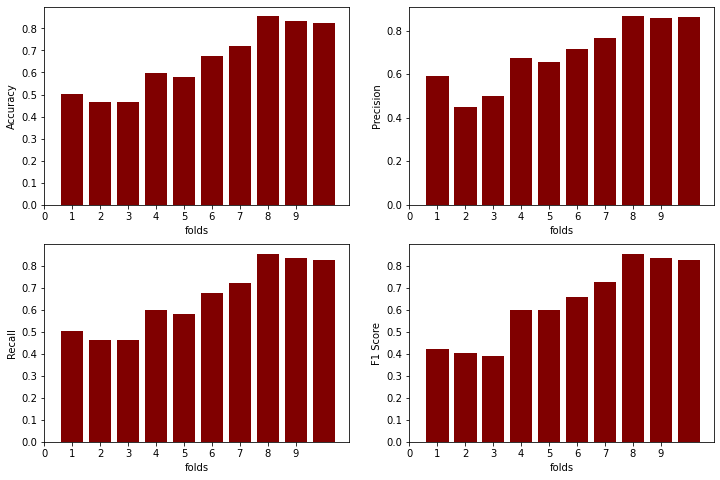

In [12]:
k_fold(img_path,model_old)

<h2>K-Fold new model</h2>
<p> K-Fold model used on the new model developed for this phase 2 </p>

Fold 1 training in progress...


Fold 1, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 6.908449649810791 
	Epoch - 3, Training Loss : 0.8070496916770935 
	Epoch - 4, Training Loss : 0.44290754199028015 
	Epoch - 5, Training Loss : 0.3349762260913849 
	Epoch - 6, Training Loss : 0.36840471625328064 
	Epoch - 7, Training Loss : 0.3267187178134918 
	Epoch - 8, Training Loss : 0.4314655065536499 
	Epoch - 9, Training Loss : 0.5381107926368713 
	Epoch - 10, Training Loss : 0.3652011454105377 
	Epoch - 11, Training Loss : 0.3181937038898468 
	Epoch - 12, Training Loss : 0.2770480811595917 
	Epoch - 13, Training Loss : 0.28676995635032654 
	Epoch - 14, Training Loss : 0.3651072680950165 
	Epoch - 15, Training Loss : 0.4187740087509155 
	Epoch - 16, Training Loss : 0.42220962047576904 
	Epoch - 17, Training Loss : 0.3457014560699463 
	Epoch - 18, Training Loss : 0.2907109558582306 
	Epoch - 19, Training Loss : 0.2487240880727768 
	Epoch - 20, Training Loss : 0.2410619705915451 

Fold 1 Classification Report : 
        

Fold 2, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.02139177918434143 
	Epoch - 2, Training Loss : 1.4560327529907227 
	Epoch - 3, Training Loss : 0.6720896363258362 
	Epoch - 4, Training Loss : 1.045758605003357 
	Epoch - 5, Training Loss : 0.7765967845916748 
	Epoch - 6, Training Loss : 0.5859003663063049 
	Epoch - 7, Training Loss : 0.4671407639980316 
	Epoch - 8, Training Loss : 0.4074796438217163 
	Epoch - 9, Training Loss : 0.4605935513973236 
	Epoch - 10, Training Loss : 0.47165432572364807 
	Epoch - 11, Training Loss : 0.5817179679870605 
	Epoch - 12, Training Loss : 0.45038238167762756 
	Epoch - 13, Training Loss : 0.243886336684227 
	Epoch - 14, Training Loss : 0.3467067778110504 
	Epoch - 15, Training Loss : 0.175184428691864 
	Epoch - 16, Training Loss : 0.17351162433624268 
	Epoch - 17, Training Loss : 0.2165800929069519 
	Epoch - 18, Training Loss : 0.12272340804338455 
	Epoch - 19, Training Loss : 0.04212689772248268 
	Epoch - 20, Training Loss : 0.12090776115655899 

Fold 2 Classification Re

Fold 3, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.09342625737190247 
	Epoch - 2, Training Loss : 0.08498954772949219 
	Epoch - 3, Training Loss : 0.3244459629058838 
	Epoch - 4, Training Loss : 0.08934149146080017 
	Epoch - 5, Training Loss : 0.13902035355567932 
	Epoch - 6, Training Loss : 0.13808484375476837 
	Epoch - 7, Training Loss : 0.07681319117546082 
	Epoch - 8, Training Loss : 0.03294156864285469 
	Epoch - 9, Training Loss : 0.012029332108795643 
	Epoch - 10, Training Loss : 0.009352982975542545 
	Epoch - 11, Training Loss : 0.3856218159198761 
	Epoch - 12, Training Loss : 0.10280478745698929 
	Epoch - 13, Training Loss : 0.07381413877010345 
	Epoch - 14, Training Loss : 0.025034943595528603 
	Epoch - 15, Training Loss : 0.020037399604916573 
	Epoch - 16, Training Loss : 0.00994838960468769 
	Epoch - 17, Training Loss : 0.005107417702674866 
	Epoch - 18, Training Loss : 0.0032009698916226625 
	Epoch - 19, Training Loss : 0.024980807676911354 
	Epoch - 20, Training Loss : 0.00436357781291008 

Fo

Fold 4, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.002227783901616931 
	Epoch - 2, Training Loss : 0.0018603402422741055 
	Epoch - 3, Training Loss : 0.0013642910635098815 
	Epoch - 4, Training Loss : 0.004170882049947977 
	Epoch - 5, Training Loss : 0.00012457337288651615 
	Epoch - 6, Training Loss : 0.033945921808481216 
	Epoch - 7, Training Loss : 0.003714202670380473 
	Epoch - 8, Training Loss : 0.022552959620952606 
	Epoch - 9, Training Loss : 0.030686622485518456 
	Epoch - 10, Training Loss : 0.02053215354681015 
	Epoch - 11, Training Loss : 0.01088146772235632 
	Epoch - 12, Training Loss : 0.0010385223431512713 
	Epoch - 13, Training Loss : 0.001217623008415103 
	Epoch - 14, Training Loss : 0.0013463468058034778 
	Epoch - 15, Training Loss : 0.0009626708342693746 
	Epoch - 16, Training Loss : 0.0008014394552446902 
	Epoch - 17, Training Loss : 0.0008404971449635923 
	Epoch - 18, Training Loss : 0.0008042947738431394 
	Epoch - 19, Training Loss : 0.0006960553582757711 
	Epoch - 20, Training Loss : 0.

Fold 5, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.00039233267307281494 
	Epoch - 2, Training Loss : 0.00883342046290636 
	Epoch - 3, Training Loss : 0.019304225221276283 
	Epoch - 4, Training Loss : 0.0002862884721253067 
	Epoch - 5, Training Loss : 0.03931571915745735 
	Epoch - 6, Training Loss : 0.24611425399780273 
	Epoch - 7, Training Loss : 0.00013807018694933504 
	Epoch - 8, Training Loss : 5.004319245927036e-05 
	Epoch - 9, Training Loss : 5.90389063290786e-05 
	Epoch - 10, Training Loss : 3.834523795376299e-06 
	Epoch - 11, Training Loss : 1.2914301805722062e-06 
	Epoch - 12, Training Loss : 1.6689232325006742e-06 
	Epoch - 13, Training Loss : 1.7285273088418762e-06 
	Epoch - 14, Training Loss : 1.6887912579477415e-06 
	Epoch - 15, Training Loss : 1.6093189287857967e-06 
	Epoch - 16, Training Loss : 1.5497148524445947e-06 
	Epoch - 17, Training Loss : 1.4702424095958122e-06 
	Epoch - 18, Training Loss : 1.4305063587016775e-06 
	Epoch - 19, Training Loss : 1.3907701941207051e-06 
	Epoch - 20, Train

Fold 6, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 2.7059113563154824e-05 
	Epoch - 2, Training Loss : 2.4655380912008695e-05 
	Epoch - 3, Training Loss : 0.027110861614346504 
	Epoch - 4, Training Loss : 0.00011990635539405048 
	Epoch - 5, Training Loss : 2.4735249098739587e-05 
	Epoch - 6, Training Loss : 1.124529808294028e-05 
	Epoch - 7, Training Loss : 0.014082307927310467 
	Epoch - 8, Training Loss : 0.00044846159289591014 
	Epoch - 9, Training Loss : 0.0002226281212642789 
	Epoch - 10, Training Loss : 0.0001382547925459221 
	Epoch - 11, Training Loss : 0.00010188904707320035 
	Epoch - 12, Training Loss : 8.150967914843932e-05 
	Epoch - 13, Training Loss : 6.818098336225376e-05 
	Epoch - 14, Training Loss : 5.884461643290706e-05 
	Epoch - 15, Training Loss : 5.173292811377905e-05 
	Epoch - 16, Training Loss : 4.619046740117483e-05 
	Epoch - 17, Training Loss : 4.183988130534999e-05 
	Epoch - 18, Training Loss : 3.826401007245295e-05 
	Epoch - 19, Training Loss : 3.524436033330858e-05 
	Epoch - 20, Trai

Fold 7, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 4.013353191112401e-06 
	Epoch - 2, Training Loss : 0.0032466233242303133 
	Epoch - 3, Training Loss : 0.00034028050140477717 
	Epoch - 4, Training Loss : 1.7602955267648213e-05 
	Epoch - 5, Training Loss : 1.7821481378632598e-05 
	Epoch - 6, Training Loss : 1.8616146917338483e-05 
	Epoch - 7, Training Loss : 1.9092931324848905e-05 
	Epoch - 8, Training Loss : 1.9331311705172993e-05 
	Epoch - 9, Training Loss : 1.931141559907701e-05 
	Epoch - 10, Training Loss : 1.9112721929559484e-05 
	Epoch - 11, Training Loss : 1.8794833522406407e-05 
	Epoch - 12, Training Loss : 1.8377608284936287e-05 
	Epoch - 13, Training Loss : 1.788091685739346e-05 
	Epoch - 14, Training Loss : 1.7364363884553313e-05 
	Epoch - 15, Training Loss : 1.6867677913978696e-05 
	Epoch - 16, Training Loss : 1.6291522115352564e-05 
	Epoch - 17, Training Loss : 1.5735236956970766e-05 
	Epoch - 18, Training Loss : 1.5119348972802982e-05 
	Epoch - 19, Training Loss : 1.456306199543178e-05 
	Epoch 

Fold 8, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 4.609392362908693e-06 
	Epoch - 2, Training Loss : 8.543313469999703e-07 
	Epoch - 3, Training Loss : 0.00010493196168681607 
	Epoch - 4, Training Loss : 3.605967867770232e-05 
	Epoch - 5, Training Loss : 0.0003103510825894773 
	Epoch - 6, Training Loss : 0.00042098542326129973 
	Epoch - 7, Training Loss : 0.0003090093086939305 
	Epoch - 8, Training Loss : 0.00024806411238387227 
	Epoch - 9, Training Loss : 0.00020779842452611774 
	Epoch - 10, Training Loss : 0.00017809233395382762 
	Epoch - 11, Training Loss : 0.0001550166925881058 
	Epoch - 12, Training Loss : 0.0001377783773932606 
	Epoch - 13, Training Loss : 0.00012341910041868687 
	Epoch - 14, Training Loss : 0.00011126388562843204 
	Epoch - 15, Training Loss : 0.00010089585703099146 
	Epoch - 16, Training Loss : 9.191795106744394e-05 
	Epoch - 17, Training Loss : 8.40123975649476e-05 
	Epoch - 18, Training Loss : 7.72389248595573e-05 
	Epoch - 19, Training Loss : 7.11605534888804e-05 
	Epoch - 20, Tra

Fold 9, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 1.6807933207019232e-05 
	Epoch - 2, Training Loss : 8.323509246110916e-05 
	Epoch - 3, Training Loss : 0.00449133338406682 
	Epoch - 4, Training Loss : 0.000324306107359007 
	Epoch - 5, Training Loss : 4.4760705350199714e-05 
	Epoch - 6, Training Loss : 3.919807932106778e-05 
	Epoch - 7, Training Loss : 3.3953332604141906e-05 
	Epoch - 8, Training Loss : 3.0258146580308676e-05 
	Epoch - 9, Training Loss : 2.7377476726542227e-05 
	Epoch - 10, Training Loss : 2.499345464457292e-05 
	Epoch - 11, Training Loss : 2.2967024051467888e-05 
	Epoch - 12, Training Loss : 2.1218720576143824e-05 
	Epoch - 13, Training Loss : 1.9728684492292814e-05 
	Epoch - 14, Training Loss : 1.837771196733229e-05 
	Epoch - 15, Training Loss : 1.7106203813455068e-05 
	Epoch - 16, Training Loss : 1.5973761037457734e-05 
	Epoch - 17, Training Loss : 1.496052118454827e-05 
	Epoch - 18, Training Loss : 1.4046615433471743e-05 
	Epoch - 19, Training Loss : 1.3212175872467924e-05 
	Epoch - 20,

Fold 10, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 3.9691505662631243e-05 
	Epoch - 2, Training Loss : 0.005546917207539082 
	Epoch - 3, Training Loss : 0.00017476351058576256 
	Epoch - 4, Training Loss : 1.8187525711255148e-05 
	Epoch - 5, Training Loss : 0.0014481961261481047 
	Epoch - 6, Training Loss : 8.48796553327702e-05 
	Epoch - 7, Training Loss : 7.374548295047134e-05 
	Epoch - 8, Training Loss : 6.334303179755807e-05 
	Epoch - 9, Training Loss : 5.477902232087217e-05 
	Epoch - 10, Training Loss : 4.77982139273081e-05 
	Epoch - 11, Training Loss : 4.209424878354184e-05 
	Epoch - 12, Training Loss : 3.7360710848588496e-05 
	Epoch - 13, Training Loss : 3.344440119690262e-05 
	Epoch - 14, Training Loss : 3.01069812849164e-05 
	Epoch - 15, Training Loss : 2.726332786551211e-05 
	Epoch - 16, Training Loss : 2.479426075296942e-05 
	Epoch - 17, Training Loss : 2.2665733922622167e-05 
	Epoch - 18, Training Loss : 2.080964441120159e-05 
	Epoch - 19, Training Loss : 1.9208968296879902e-05 
	Epoch - 20, Traini

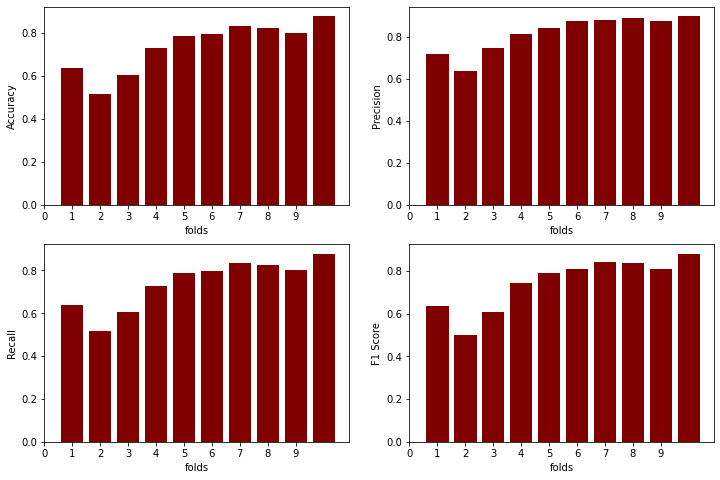

In [13]:
k_fold(img_path,model_new)